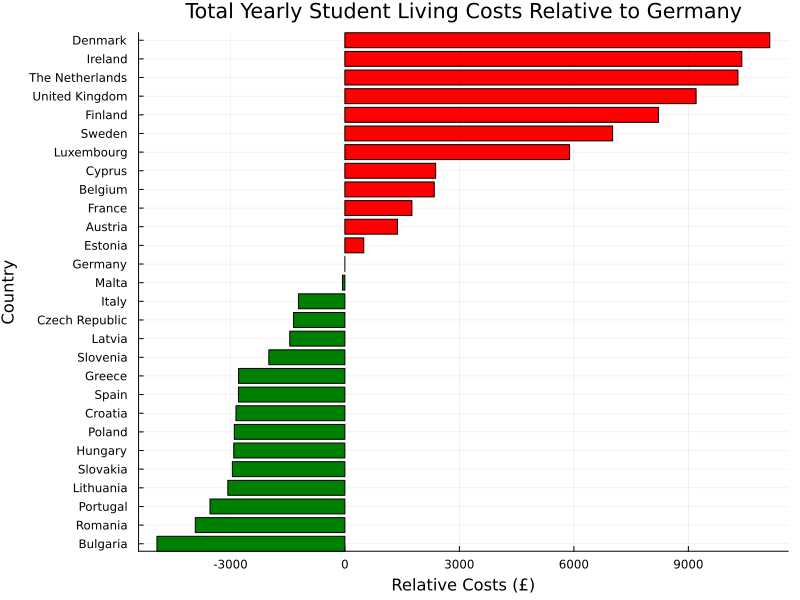

In [1]:
using DataFrames, XLSX, Plots, Printf
using PlotlyJS, WebIO

sheet_name = "Sheet1" 
file_path = "cheapest_countries_to_study_Europe_2023.xlsx"

data = XLSX.readxlsx(file_path)
df = DataFrame(XLSX.readtable(file_path, XLSX.sheetnames(data)[1]))

# Calculate relative costs to Germany
germany_costs = df[df.Country .== "Germany", :][!,"Total yearly living costs and fees (£)"][1]
df[!, "Relative to Germany (£)"] = df[!, "Total yearly living costs and fees (£)"] .- germany_costs

# Sort data
sort!(df, :("Relative to Germany (£)"))

# Plotting
p = Plots.bar(df.Country,df[:, "Relative to Germany (£)"], label="Relative Costs (£)", 
        color=[rc > 0 ? :red : :green for rc in df[!, "Relative to Germany (£)"]], permute = (:x, :y), xticks = :all,yformatter = x -> @sprintf("%d", x),legend=false)

# Adding labels and titles
xlabel!("Relative Costs (£)")
ylabel!("Country")
title!("Total Yearly Student Living Costs Relative to Germany")
Plots.plot!(size=(800, 600))

display(p)


In [29]:


# Create a bar chart trace
trace = PlotlyJS.bar(y=df[!, :Country], x=df[!, :"Relative to Germany (£)"],orientation = "h",marker_color=[rc > 0 ? :red : :green for rc in df[!, "Relative to Germany (£)"]])


# Define the layout with explicit tick values and text
layout = Layout(
    title="Total Yearly Student Living Costs Relative to Germany",
    xaxis = attr(title = "Relative Costs (£)"),  # X-axis title
    yaxis = attr(
        title = "Country",  # Y-axis title
        tickvals = 0:length(df.Country),  # Tick positions
        ticktext = df.Country  # Tick labels
    ),
    height = 400  # Height of the plot
)

fig = PlotlyJS.plot(trace, layout)
PlotlyJS.display(fig)

data: [
  "bar with fields marker, orientation, type, x, and y"
]

layout: "layout with fields height, margin, template, title, xaxis, and yaxis"